# Shallow Neural Network with one hidden layer

Welcome to the Shallow Neural Network programming assignment! It's time to build your first neural network, which will have one hidden layer. Now, you'll notice a big difference between this model and the one you implemented previously using logistic regression.

By the end of this assignment, you'll be able to:

- Implement a forecasting model using neural network with a single hidden layer
- Use units with a non-linear activation function, such as tanh
- Implement forward and backward propagation


## Important Note on answering the questions on CANVAS:

In order to answer the questions correctly, you only need to write the codes in places which are specified as:
```python

# YOUR CODE STARTS HERE

YOUR CODE

# YOUR CODE ENDS HERE
```

You shouldn't change other lines of code. However, you can always make a copy of the file and investigate other lines.

## Table of Contents
- [1 - Packages](#1)
- [2 - Load the Dataset and Normalization](#2)
    - [Exercise 1](#ex-1)
- [3 - Neural Network model](#3)
    - [3.1 - Defining the neural network structure](#3-1)
        - [Exercise 2 - layer_sizes](#ex-2)
    - [3.2 - Initialize the model's parameters](#3-2)
        - [Exercise 3 - initialize_parameters](#ex-3)
    - [3.3 - The Loop](#3-3)
        - [Exercise 4 - forward_propagation](#ex-4)
    - [3.4 - Compute the Cost](#3-4)
        - [Exercise 5 - compute_cost](#ex-5)
    - [3.5 - Implement Backpropagation](#3-5)
        - [Exercise 6 - backward_propagation](#ex-6)
    - [3.6 - Update Parameters](#3-6)
        - [Exercise 7 - update_parameters](#ex-7)
    - [3.7 - Integration](#3-7)
- [4 - Test the Model](#4)
    - [4.1 - Predict](#4-1)
        - [Exercise 8 - predict](#ex-8)
    - [4.2 - Test the Model on the wastwater data ](#4-2)
- [5 - Results Analysis](#5)
- [6 - References](#6)

<a name='1'></a>
# 1 - Packages

First import all the packages that you will need during this assignment.

- [numpy](https://www.numpy.org/) is the fundamental package for scientific computing with Python.
- [pandas](https://www.w3schools.com/python/pandas/pandas_intro.asp#:~:text=What%20is%20Pandas%3F,by%20Wes%20McKinney%20in%202008.) used for working with data sets.
- [sklearn](http://scikit-learn.org/stable/) provides simple and efficient tools for data mining and data analysis. 
- [matplotlib](http://matplotlib.org) is a library for plotting graphs in Python.
- testCases provides some test examples to assess the correctness of your functions

In [2]:
# Package imports
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
from testCases_v2 import *
from public_tests import *

<a name='2'></a>
# 2 - Load the Dataset and Normalization
Data from 2009 to 2018 will be used as training sets. Data for 2019 will be used for testing.

In [3]:
# Loading the data 
# Loading the data 
input_data = pd.read_excel("Input for ANN_10year.xlsx")
input_data_2019 = pd.read_excel("Input for ANN.xlsx")
input_data = input_data.values   # .values converts a pandas dataframe to a numpy array 
input_data_2019 = input_data_2019.values

In [4]:
#Categorizing the data into inputs (x) and outputs (y) as well as training set and testing set
train_set_x_orig = input_data[:87600,1:8]
test_set_x_orig = input_data_2019[:8760,1:8]
train_set_y_orig = input_data[:87600,-1:]
test_set_y_orig = input_data_2019[:8760,-1:]

In [5]:
#Normalization process
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train_set_x_normalized = scaler.fit_transform(train_set_x_orig)
test_set_x_normalized = scaler.fit_transform(test_set_x_orig)
train_set_y_normalized = scaler.fit_transform(train_set_y_orig)
test_set_y_normalized = scaler.fit_transform(test_set_y_orig)

#Transpose the data to put all features in the rows and all samples in the columns
train_set_x_normalized = train_set_x_normalized.T     # .T Transpose a numpy array  
test_set_x_normalized = test_set_x_normalized.T
train_set_y_normalized = train_set_y_normalized.T
test_set_y_normalized = test_set_y_normalized.T

<a name='ex-1'></a>
### Exercise 1 
Find the values for:
    - m_train (number of training examples)
    - m_test (number of test examples)
For instance, you can access `m_train` by writing `train_set_x_orig.shape[0]`.

Run the following cell to answer exercise 1 on CANVAS.

In [6]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("train_set_x shape: " + str(train_set_x_normalized.shape))
print ("train_set_y shape: " + str(train_set_y_normalized.shape))
print ("test_set_x shape: " + str(test_set_x_normalized.shape))
print ("test_set_y shape: " + str(test_set_y_normalized.shape))

Number of training examples: m_train = 87600
Number of testing examples: m_test = 8760
train_set_x shape: (7, 87600)
train_set_y shape: (1, 87600)
test_set_x shape: (7, 8760)
test_set_y shape: (1, 8760)


<a name='3'></a>
## 3 - Neural Network model

You're going to train a Neural Network with a single hidden layer and see how that handles the same problem you solved with Logistic Regression.

**The model**:
<img src="Images/NN model.PNG" style="width:600px;height:300px;">

**Mathematically**:

For one example $x^{(i)}$:
$$
z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}\tag{1}
$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$

Given the predictions on all the examples, you can also compute the cost $J$ as follows: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{5}$$

**Reminder**: The general methodology to build a Neural Network is to:
    1. Define the neural network structure ( # of input units,  # of hidden units, etc). 
    2. Initialize the model's parameters
    3. Loop:
        - Implement forward propagation
        - Compute loss
        - Implement backward propagation to get the gradients
        - Update parameters (gradient descent)

In practice, you'll often build helper functions to compute steps 1-3, then merge them into one function called `nn_model()`. Once you've built `nn_model()` and learned the right parameters, you can make predictions on new data.

<a name='3-1'></a>
### 3.1 - Defining the neural network structure ####

<a name='ex-2'></a>
### Exercise 2 - layer_sizes 

Define three variables:
    - n_x: the size of the input layer
    - n_h: the size of the hidden layer (**set this to 4, only for this Exercise 2**) 
    - n_y: the size of the output layer

**Hint**: Use shapes of X and Y to find n_x and n_y. Also, hard code the hidden layer size to be 4.

In [7]:
# GRADED FUNCTION: layer_sizes

def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    #(≈ 3 lines of code)

    # YOUR CODE STARTS HERE
    n_x = X.shape[0]  # size of input layer
    n_h = 4          # size of hidden layer = 4
    n_y = Y.shape[0]  # size of output layer

    # YOUR CODE ENDS HERE
    return (n_x, n_h, n_y)

Complete previous cell and run the following cell to answer exercise 2 on CANVAS.

In [8]:
t_X, t_Y = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(t_X, t_Y)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


<a name='3-2'></a>
### 3.2 - Initialize the model's parameters ####

<a name='ex-3'></a>
### Exercise 3 -  initialize_parameters

Implement the function `initialize_parameters()`.

**Instructions**:
- Make sure your parameters' sizes are right. Refer to the neural network figure above if needed.
- You will initialize the weights matrices with random values. 
    - Use: `np.random.randn(a,b) * 0.01` to randomly initialize a matrix of shape (a,b).
- You will initialize the bias vectors as zeros. 
    - Use: `np.zeros((a,b))` to initialize a matrix of shape (a,b) with zeros.

In [9]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """    
    #(≈ 4 lines of code)
    # W1 = ...
    # b1 = ...
    # W2 = ...
    # b2 = ...
    # YOUR CODE STARTS HERE
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    # YOUR CODE ENDS HERE

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

Complete previous cell and run the following cell to answer exercise 3 on CANVAS.

In [10]:
np.random.seed(2)
n_x, n_h, n_y = initialize_parameters_test_case()
parameters = initialize_parameters(n_x, n_h, n_y)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


In [11]:
def sigmoid(z):
    s=1/(1+np.exp(-z))
    return s

<a name='3-3'></a>
### 3.3 - The Loop 

<a name='ex-4'></a>
### Exercise 4 - forward_propagation

Implement `forward_propagation()` using the following equations:

$$
Z^{[1]} =  W^{[1]} X + b^{[1]}\tag{6}
$$ 
$$
A^{[1]} = \tanh(Z^{[1]})\tag{7}
$$
$$
Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}\tag{8}
$$
$$
\hat{Y} = A^{[2]} = \sigma(Z^{[2]})\tag{9}
$$


**Instructions**:

- Check the mathematical representation of yourmodel in the figure above.
- Use the function `sigmoid()`. It's built into in the previous cell.
- Use the function `np.tanh()`. It's part of the numpy library.
- Implement using these steps:
    1. Retrieve each parameter from the dictionary "parameters" (which is the output of `initialize_parameters()` by using `parameters[".."]`.
    2. Implement Forward Propagation. Compute $Z^{[1]}, A^{[1]}, Z^{[2]}$ and $A^{[2]}$ (the vector of all your predictions on all the examples in the training set).
- Values needed in the backpropagation are stored in "cache". The cache will be given as an input to the backpropagation function.

In [12]:
# GRADED FUNCTION:forward_propagation

def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    #(≈ 4 lines of code)
    # W1 = ...
    # b1 = ...
    # W2 = ...
    # b2 = ...
    # YOUR CODE STARTS HERE
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
     
    # YOUR CODE ENDS HERE
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    # (≈ 4 lines of code)
    # Z1 = ...
    # A1 = ...
    # Z2 = ...
    # A2 = ...
    # YOUR CODE STARTS HERE
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    # YOUR CODE ENDS HERE
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

Complete previous cell and run the following cell to answer exercise 4 on CANVAS.

In [13]:
t_X, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(t_X, parameters)
print("A2 = " + str(A2))

A2 = [[0.21292656 0.21274673 0.21295976]]


<a name='3-4'></a>
### 3.4 - Compute the Cost

Now that you've computed $A^{[2]}$ (in the Python variable "`A2`"), which contains $a^{[2](i)}$ for all examples, you can compute the cost function as follows:

$$J = - \frac{1}{m} \sum\limits_{i = 1}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{10}$$

<a name='ex-5'></a>
### Exercise 5 - compute_cost 

Implement `compute_cost()` to compute the value of the cost $J$.

**Instructions**:
- There are many ways to compute loss. This is one way to implement one part of the equation without for loops:
$- \sum\limits_{i=1}^{m}  y^{(i)}\log(a^{[2](i)})$:
```python
logprobs = np.multiply(np.log(A2),Y)
cost = - np.sum(logprobs)          
```

- Use that to build the whole expression of the cost function.

**Notes**: 

- You can use either `np.multiply()` and then `np.sum()` or directly `np.dot()`).  
- If you use `np.multiply` followed by `np.sum` the end result will be a type `float`, whereas if you use `np.dot`, the result will be a 2D numpy array.  
- You can use `np.squeeze()` to remove redundant dimensions (in the case of single float, this will be reduced to a zero-dimension array). 
- You can also cast the array as a type `float` using `float()`.

In [14]:
# GRADED FUNCTION: compute_cost

def compute_cost(A2, Y):
    """
    Computes the cost given in equation (10)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)

    Returns:
    cost -- cost given equation (10)
    
    """
    
    m = Y.shape[1] # number of examples

    # Compute the cross-entropy cost
    # (≈ 2 lines of code)
    # logprobs = ...
    # cost = ...
    # YOUR CODE STARTS HERE
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    cost = - np.sum(logprobs) / m
    
    # YOUR CODE ENDS HERE
    
    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. 
                                    # E.g., turns [[17]] into 17 
    
    return cost

Complete previous cell and run the following cell to answer exercise 5 on CANVAS.

In [15]:
A2, t_Y = compute_cost_test_case()
cost = compute_cost(A2, t_Y)
print("cost = " + str(compute_cost(A2, t_Y)))

cost = 0.6930587610394646


<a name='3-5'></a>
### 3.5 - Implement Backpropagation

Using the cache computed during forward propagation, you can now implement backward propagation.

<a name='ex-6'></a>
### Exercise 6 -  backward_propagation

Implement the function `backward_propagation()`.

**Instructions**:
Backpropagation is usually the hardest (most mathematical) part in deep learning. To help you, here again is the slide from the lecture on backpropagation. You'll want to use the six equations.  

<img src="Images/Back propagation.PNG" style="width:400px;height:200px;">

<!--
$\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } = \frac{1}{m} (a^{[2](i)} - y^{(i)})$

$\frac{\partial \mathcal{J} }{ \partial W_2 } = \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } a^{[1] (i) T} $

$\frac{\partial \mathcal{J} }{ \partial b_2 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)}}}$

$\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} } =  W_2^T \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } * ( 1 - a^{[1] (i) 2}) $

$\frac{\partial \mathcal{J} }{ \partial W_1 } = \frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} }  X^T $

$\frac{\partial \mathcal{J} _i }{ \partial b_1 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)}}}$

- Note that $*$ denotes elementwise multiplication.
- The notation you will use is common in deep learning coding:
    - dW1 = $\frac{\partial \mathcal{J} }{ \partial W_1 }$
    - db1 = $\frac{\partial \mathcal{J} }{ \partial b_1 }$
    - dW2 = $\frac{\partial \mathcal{J} }{ \partial W_2 }$
    - db2 = $\frac{\partial \mathcal{J} }{ \partial b_2 }$
    
!-->

- Tips:
    - To compute dZ1 you'll need to compute $g^{[1]'}(Z^{[1]})$. Since $g^{[1]}(.)$ is the tanh activation function, if $a = g^{[1]}(z)$ then $g^{[1]'}(z) = 1-a^2$. So you can compute 
    $g^{[1]'}(Z^{[1]})$ using `(1 - np.power(A1, 2))`.

In [16]:
# GRADED FUNCTION: backward_propagation

def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    #(≈ 2 lines of code)
    # W1 = ...
    # W2 = ...
    # YOUR CODE STARTS HERE
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    # YOUR CODE ENDS HERE
        
    # Retrieve also A1 and A2 from dictionary "cache".
    #(≈ 2 lines of code)
    # A1 = ...
    # A2 = ...
    # YOUR CODE STARTS HERE
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    # YOUR CODE ENDS HERE
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    #(≈ 6 lines of code, corresponding to 6 equations on slide above)
    # dZ2 = ...
    # dW2 = ...
    # db2 = ...
    # dZ1 = ...
    # dW1 = ...
    # db1 = ...
    # YOUR CODE STARTS HERE
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    
    # YOUR CODE ENDS HERE
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

Complete previous cell and run the following cell to answer exercise 6 on CANVAS.

In [17]:
parameters, cache, t_X, t_Y = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, t_X, t_Y)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]
db1 = [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]]
dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[-0.16655712]]


<a name='3-6'></a>
### 3.6 - Update Parameters 

<a name='ex-7'></a>
### Exercise 7 - update_parameters

Implement the update rule. Use gradient descent. You have to use (dW1, db1, dW2, db2) in order to update (W1, b1, W2, b2).

**General gradient descent rule**: $\theta = \theta - \alpha \frac{\partial J }{ \partial \theta }$ where $\alpha$ is the learning rate and $\theta$ represents a parameter.

**Hint**

- Use `copy.deepcopy(...)` when copying lists or dictionaries that are passed as parameters to functions. It avoids input parameters being modified within the function. In some scenarios, this could be inefficient, but it is required for grading purposes.

In [18]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate=1.2):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve a copy of each parameter from the dictionary "parameters". Use copy.deepcopy(...) for W1 and W2
    #(≈ 4 lines of code)
    # W1 = ...
    # b1 = ...
    # W2 = ...
    # b2 = ...
    # YOUR CODE STARTS HERE
    W1 = copy.deepcopy(parameters["W1"])
    b1 = parameters["b1"]
    W2 = copy.deepcopy(parameters["W2"])
    b2 = parameters["b2"]
    
    # YOUR CODE ENDS HERE
    
    # Retrieve each gradient from the dictionary "grads"
    #(≈ 4 lines of code)
    # dW1 = ...
    # db1 = ...
    # dW2 = ...
    # db2 = ...
    # YOUR CODE STARTS HERE
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]   
    
    # YOUR CODE ENDS HERE
    
    # Update rule for each parameter
    #(≈ 4 lines of code)
    # W1 = ...
    # b1 = ...
    # W2 = ...
    # b2 = ...
    # YOUR CODE STARTS HERE
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    # YOUR CODE ENDS HERE
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

Complete previous cell and run the following cell to answer exercise 7 on CANVAS.

In [19]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads, learning_rate=1.2)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


<a name='3-7'></a>
### 3.7 - Integration

Integrate your functions in `nn_model()` 

Build your neural network model in `nn_model()`.

**Instructions**: The neural network model has to use the previous functions in the right order.

In [20]:
#FUNCTION: nn_model

def nn_model(X, Y, n_h, num_iterations = 1000, learning_rate=0.85, print_cost=True):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters
    #(≈ 1 line of code)
    # parameters = ...
    # YOUR CODE STARTS HERE
    parameters = initialize_parameters(n_x, n_h, n_y)    
    # YOUR CODE ENDS HERE
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
         
        #(≈ 4 lines of code)
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        # A2, cache = ...
                
        # Cost function. Inputs: "A2, Y". Outputs: "cost".
        # cost = ...
         
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        # grads = ...
         
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        # parameters = ...
                
        # YOUR CODE STARTS HERE
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # YOUR CODE ENDS HERE
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

<a name='4'></a>
## 4 - Test the Model

<a name='4-1'></a>
### 4.1 - Predict

<a name='ex-8'></a>
### Exercise 8 - predict

Predict with your model by building `predict()`.
Use forward propagation to predict results.

In [21]:
# GRADED FUNCTION: predict

def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model
    """
    
    
    #(≈ 2 lines of code)
    # A2, cache = ...
    # predictions = ...
    # YOUR CODE STARTS HERE
    A2, cache = forward_propagation(X, parameters)
    predictions = A2
    
    # YOUR CODE ENDS HERE
    
    return predictions

Complete the nn_model cell and previous cell and run the following cell to answer exercise 8 on CANVAS.

In [22]:
parameters, t_X = predict_test_case()

predictions = predict(parameters, t_X)
print("Predictions: " + str(predictions))

Predictions: [[0.50154066 0.49899566 0.50213783]]


<a name='4-2'></a>
### 4.2 - Test the Model on the wastwater data 

It's time to run the model and see how it performs wastewater dataset. Run the following code to test your model with a single hidden layer of $n_h$ hidden units!

In [23]:
#Tuning hidden layer size
X = train_set_x_normalized
Y = train_set_y_normalized
learning_rate = .85
num_iterations = 2000
hidden_layer_sizes = [20]
for i, n_h in enumerate(hidden_layer_sizes):
    X = train_set_x_normalized
    Y = train_set_y_normalized
    parameters = nn_model(X, Y, n_h, print_cost=False)
    Y_prediction_train = predict(parameters, X)
    Train_accuracy=(100 - np.mean(np.abs(Y_prediction_train - train_set_y_normalized)) * 100)
    
    X = test_set_x_normalized
    Y_prediction_test = predict(parameters, X)
    Test_accuracy=(100 - np.mean(np.abs(Y_prediction_test - test_set_y_normalized)) * 100)
    
        
    print ("Train Accuracy for {} hidden units: {} %".format(n_h, Train_accuracy))
    print ("Test Accuracy for {} hidden units: {} %".format(n_h, Test_accuracy))

Train Accuracy for 20 hidden units: 92.66397492688859 %
Test Accuracy for 20 hidden units: 90.03634685780028 %


In the next cell, we denormalize the prediced values of test data set and compare with real values.

In [24]:
#Reverse normalization
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Reverse the normalization to get the original data
Y_prediction_test_real_scale = scaler.inverse_transform(predict(parameters, test_set_x_normalized))

<a name='5'></a>
##  5 - Results Analysis

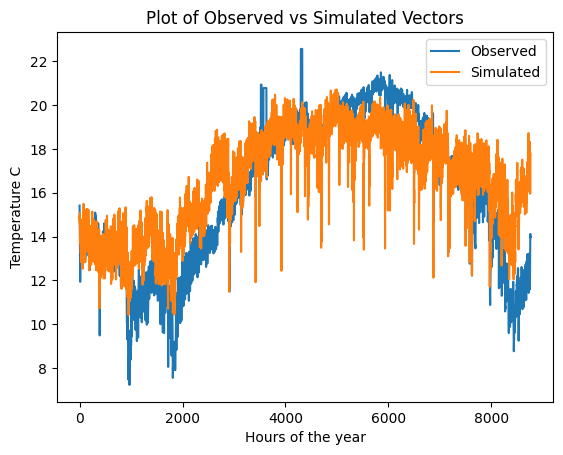

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Define the two vectors

x = np.arange(0,8760, 1)
y1 = test_set_y_orig    
y2 = Y_prediction_test_real_scale.T

# Plot the vectors
plt.plot(x, y1, label='Observed')
plt.plot(x, y2, label='Simulated')

# Add a title and labels for the x and y axes
plt.title('Plot of Observed vs Simulated Vectors')
plt.xlabel('Hours of the year')
plt.ylabel('Temperature C')

# Set the y-axis limits
plt.ylim()

# Add a legend
plt.legend()

# Display the plot
plt.show()

<a name='6'></a>
##  6 - Rferences
- Speech and Language Processing. Daniel Jurafsky & James H. Martin. Draft of January 7, 2023.Chapter 5, Logistic Regression
- https://www.deeplearning.ai/
- http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/